In [1]:
import datetime
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

HISTORY_DAYS = 7
AVG_SECONDS = 60

# Weekdays
MORNING_MIN, MORNING_MAX = 100.0, 700.0
MID_MIN, MID_MAX = 200.0, 1100.0
EVENING_MIN, EVENING_MAX = 500.0, 3000.0

R_MORNING_MIN, R_MORNING_MAX = 0.0, 1.0
R_MID_MIN, R_MID_MAX = 0.0, 1.0
R_EVENING_MIN, R_EVENING_MAX = 0.0, 1.0

# Weekends
W_MORNING_MIN, W_MORNING_MAX = 100.0, 400.0
W_MID_MIN, W_MID_MAX = 400.0, 1400.0
W_EVENING_MIN, W_EVENING_MAX = 500.0, 3000.0

W_R_MORNING_MIN, W_R_MORNING_MAX = 0.0, 1.0
W_R_MID_MIN, W_R_MID_MAX = 0.0, 1.0
W_R_EVENING_MIN, W_R_EVENING_MAX = 0.0, 1.0


today = datetime.date.today()
weekday = today.weekday()

start_delta = datetime.timedelta(days=HISTORY_DAYS)

In [2]:
start_time = today - start_delta

start_unix_timestamp = int(start_time.strftime("%s"))
now_unix_timestamp = int(time.time())

# datetime.datetime.utcfromtimestamp(int(start_of_week.strftime("%s")))

In [3]:
_count = 0
_traffic_timestamp = []
_traffic_sent = []
_traffic_received = []

for _time in range(start_unix_timestamp, now_unix_timestamp, AVG_SECONDS):
    _dt = datetime.datetime.utcfromtimestamp(_time)
    _count += 1
    _hour = _dt.hour
    
    _weekday = _dt.weekday()
    
    _traffic_timestamp.append(_time)

    if _weekday > 4:
        if _hour >= 22 or _hour <= 8:
            # print(_dt.hour, " ", "Morning", ":", round(random.uniform(MORNING_MIN, MORNING_MAX), 7))
            _traffic_sent.append(round(random.uniform(W_MORNING_MIN, W_MORNING_MAX), 7))
            _traffic_received.append(round(random.uniform(W_R_MORNING_MIN, W_R_MORNING_MAX), 7))
        elif _hour > 8 and _hour <= 18:
            # print(_dt.hour, " ", "Mid", ":", round(random.uniform(MID_MIN, MID_MAX), 7))
            _traffic_sent.append(round(random.uniform(W_MID_MIN, W_MID_MAX), 7))
            _traffic_received.append(round(random.uniform(W_R_MID_MIN, W_R_MID_MAX), 7))
        elif _hour > 18 and _hour <= 22:         
            # print(_dt.hour, " ", "Evening", ":", round(random.uniform(EVENING_MIN, EVENING_MAX), 7))
            _traffic_sent.append(round(random.uniform(W_EVENING_MIN, W_EVENING_MAX), 7))
            _traffic_received.append(round(random.uniform(W_R_EVENING_MIN, W_R_EVENING_MAX), 7))    
    else:
        if _hour >= 22 or _hour <= 8:
            # print(_dt.hour, " ", "Morning", ":", round(random.uniform(MORNING_MIN, MORNING_MAX), 7))
            _traffic_sent.append(round(random.uniform(MORNING_MIN, MORNING_MAX), 7))
            _traffic_received.append(round(random.uniform(R_MORNING_MIN, R_MORNING_MAX), 7))
        elif _hour > 8 and _hour <= 18:
            # print(_dt.hour, " ", "Mid", ":", round(random.uniform(MID_MIN, MID_MAX), 7))
            _traffic_sent.append(round(random.uniform(MID_MIN, MID_MAX), 7))
            _traffic_received.append(round(random.uniform(R_MID_MIN, R_MID_MAX), 7))
        elif _hour > 18 and _hour <= 22:         
            # print(_dt.hour, " ", "Evening", ":", round(random.uniform(EVENING_MIN, EVENING_MAX), 7))
            _traffic_sent.append(round(random.uniform(EVENING_MIN, EVENING_MAX), 7))
            _traffic_received.append(round(random.uniform(R_EVENING_MIN, R_EVENING_MAX), 7))


print(_count)


2430


In [4]:
df = pd.DataFrame(list(zip(_traffic_sent, _traffic_received)), columns=['sent', 'received'], index=_traffic_timestamp)

# df['datetime'] = pd.to_datetime(df["timestamp"], unit='s')
df.head(5)

,sent,received
1585353600,109.694024,0.817899
1585353660,299.381753,0.662606
1585353720,362.814054,0.074325
1585353780,195.301507,0.143464
1585353840,193.172307,0.707614


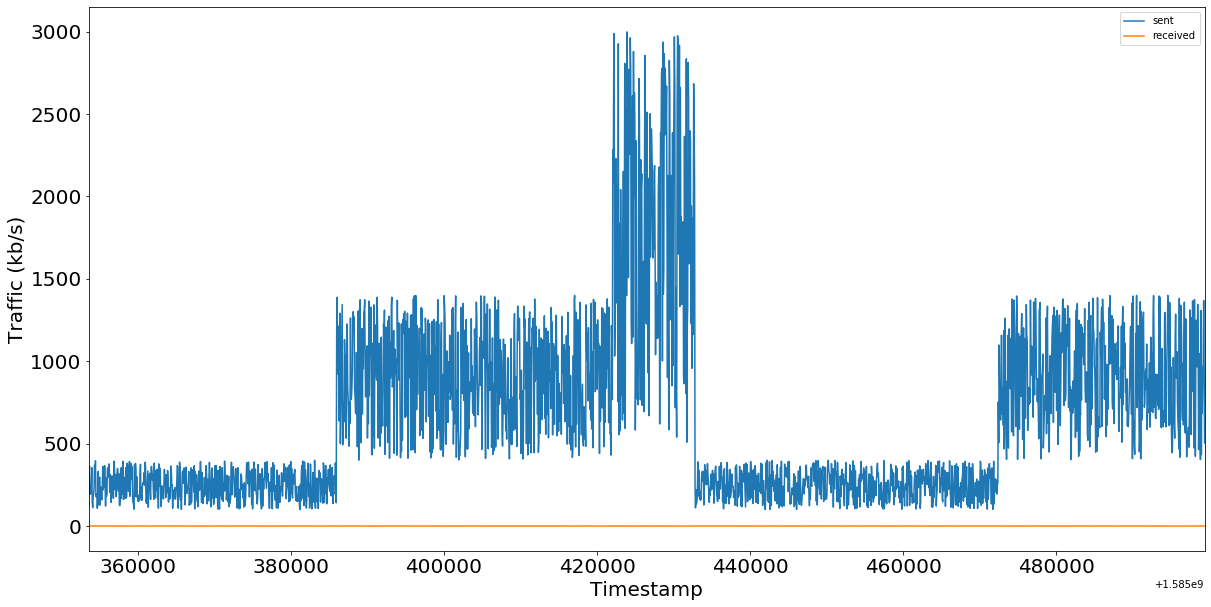

In [5]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()

In [6]:
df.to_csv('./data/dataset_{days}_day_traffic.csv'.format(days=HISTORY_DAYS))